# EDA and Preprocessing
notebook for exploratory data analysis and preprocessing.

## 1). Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from pathlib import Path
%matplotlib inline


## 2). Loading and Exploring Data

In [1]:
from pathlib import Path
import pandas as pd

#  path to the CSV so the notebook can load directly in VS Code
data_file = Path(r"C:\Github Projects\AI-MARKETING-STRATEGY_ADVISOR\data\raw\bank-full.csv")
df = pd.read_csv(data_file, sep=';')

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

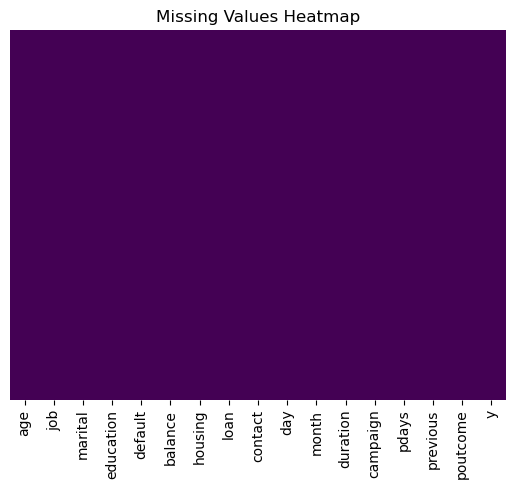

In [ ]:
sb.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show() # no null value present

In [11]:
print(df["job"].value_counts())
print(df["marital"].value_counts())
print(df["education"].value_counts())
print(df["default"].value_counts())
print(df["housing"].value_counts())
print(df["loan"].value_counts())
print(df["contact"].value_counts())
print(df["month"].value_counts())
print(df["poutcome"].value_counts())
print(df["day"].value_counts())
print(df["duration"].value_counts())
print(df["campaign"].value_counts())
print(df["pdays"].value_counts())
print(df["previous"].value_counts())



job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
default
no     44396
yes      815
Name: count, dtype: int64
housing
yes    25130
no     20081
Name: count, dtype: int64
loan
no     37967
yes     7244
Name: count, dtype: int64
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
poutcome
unknown    36959
failure     4901
other  

### Dropping these 3 columns as there is no need of this in predicting "y"

In [18]:
df.drop(['duration', 'day', 'default'], axis=1, inplace=True)

In [13]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,may,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,may,1,-1,0,unknown,no


### From column pdays we extract a feature named 'ever_contacted' which shows yes(1) or no(0)

In [19]:

df['ever_contacted'] = (df['pdays'] != -1).astype(int)

print('ever_contacted value counts:')
print(df['ever_contacted'].value_counts())
df.drop('pdays', axis=1, inplace=True)


ever_contacted value counts:
ever_contacted
0    36954
1     8257
Name: count, dtype: int64


## 3). DATA VISUALISATION

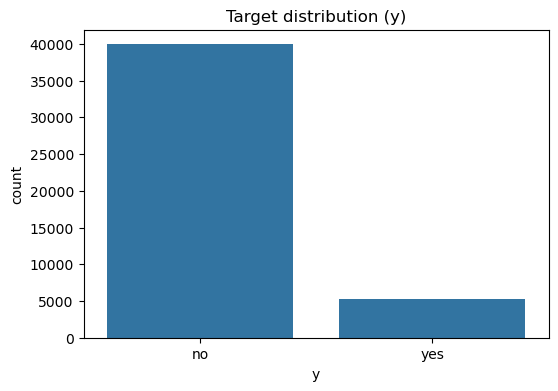

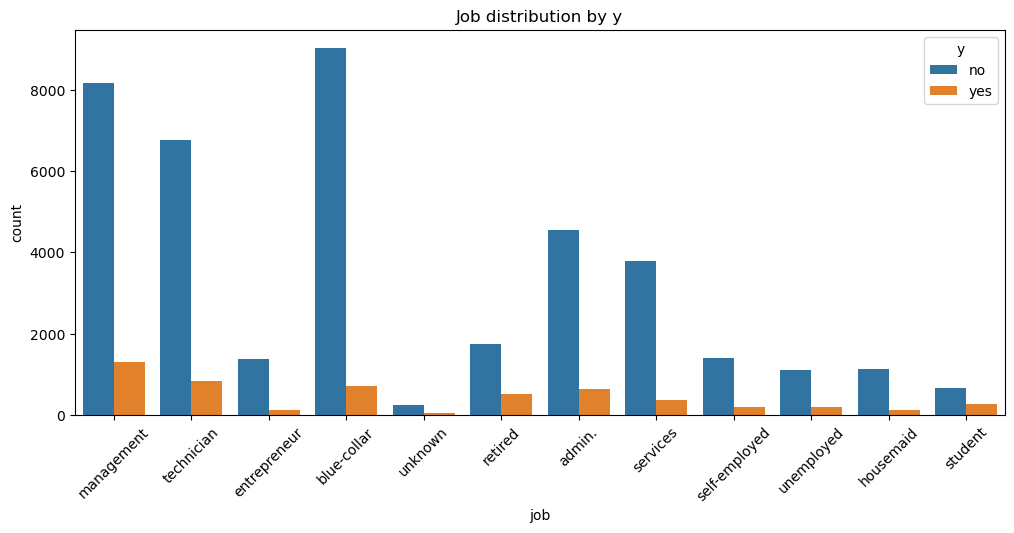

In [12]:
# Plot 1: Seaborn countplot of y
plt.figure(figsize=(6,4))
sb.countplot(x='y', data=df)
plt.title('Target distribution (y)')
plt.show()

# Plot 2: Seaborn countplot of job by y (stacked by hue)
plt.figure(figsize=(12,5))
sb.countplot(x='job', hue='y', data=df)
plt.title('Job distribution by y')
plt.xticks(rotation=45)
plt.show()


In [90]:
import plotly.express as px

# Plot 3: Plotly bar of education vs conversion rate (y)
edu_rate = df.groupby('education')['y'].apply(lambda s: (s=='yes').mean()).reset_index(name='conv_rate')
fig = px.bar(edu_rate, x='education', y='conv_rate', title='Conversion rate by education', text='conv_rate')
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.show()

# Plot 4: Plotly box plot of balance by y
fig = px.box(df, x='y', y='balance', title='Balance distribution by y')
fig.show()


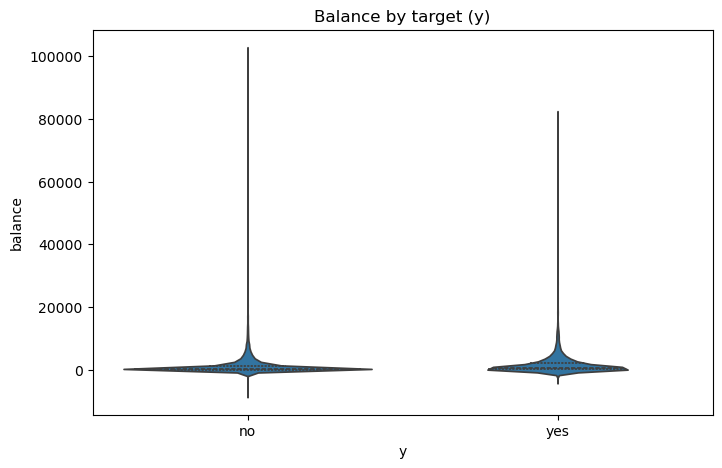

In [85]:
# Plot 5: Seaborn violin of balance by y
plt.figure(figsize=(8,5))
sb.violinplot(x='y', y='balance', data=df, inner='quartile')
plt.title('Balance by target (y)')
plt.show()

# Plot 6: Plotly pie of contact types split by y (shows % of contact types)
contact_counts = df.groupby(['y','contact']).size().reset_index(name='count')
fig = px.pie(contact_counts, names='contact', values='count', facet_col='y', title='Contact type distribution by y')
fig.show()


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

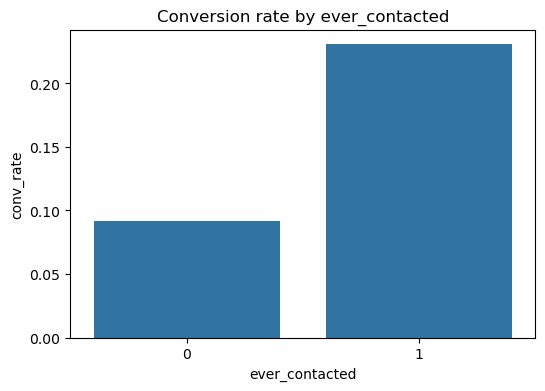

In [80]:
# Plot 7: Plotly scatter of balance vs age colored by y
fig = px.scatter(df.sample(3000, random_state=1), x='age', y='balance', color='y', title='Balance vs Age (sample)')
fig.show()

# Plot 8: Seaborn barplot of ever_contacted vs conversion rate
if 'ever_contacted' in df.columns:
    ec_rate = df.groupby('ever_contacted')['y'].apply(lambda s: (s=='yes').mean()).reset_index(name='conv_rate')
    plt.figure(figsize=(6,4))
    sb.barplot(x='ever_contacted', y='conv_rate', data=ec_rate)
    plt.title('Conversion rate by ever_contacted')
    plt.show()


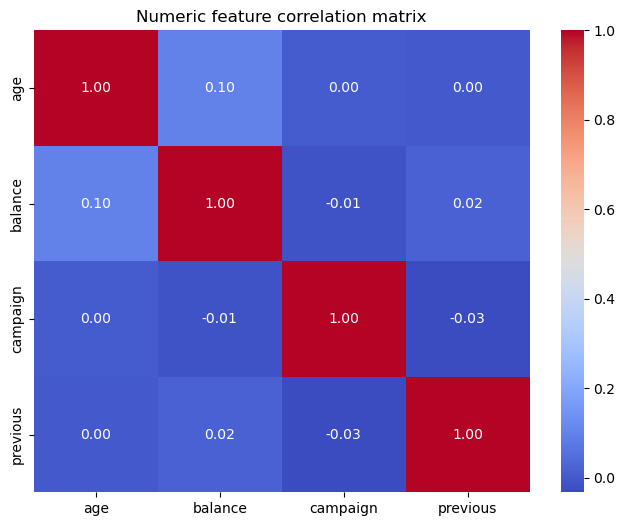

In [76]:
# Plot 9: Plotly histogram of campaign by y
fig = px.histogram(df, x='campaign', color='y', barmode='group', nbins=50, title='Campaign count by y')
fig.show()

num = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(8,6))
sb.heatmap(num, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric feature correlation matrix')
plt.show()


In [17]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

## 4). Balancing the target column by OverSampling

In [21]:
# Balance target 'y' by oversampling the minority class using imb-learn
from imblearn.over_sampling import RandomOverSampler

# original distribution
print('Original y distribution:')
print(df['y'].value_counts())

# Prepare features and target
X = df.drop(columns=['y'])
y = df['y']

# Apply RandomOverSampler (works with categorical data)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# concat to make balanced dataframe
df_balanced = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res, name='y')], axis=1)

print('\nBalanced y distribution:')
print(df_balanced['y'].value_counts())



Original y distribution:
y
no     39922
yes     5289
Name: count, dtype: int64

Balanced y distribution:
y
no     39922
yes    39922
Name: count, dtype: int64


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



In [22]:
df_balanced.shape

(79844, 14)

## 5). Finding and dealing with outiers

-> We handled outliers using the Interquartile Range (IQR) rule, removing values lying below Q1 − 1.5×IQR or above Q3 + 1.5×IQR for numeric columns (age, balance, campaign, previous).
This cleaned extreme values while keeping most valid data points, improving model stability and accuracy.

-> For campaign and previous, we found no extreme outliers , both had naturally small ranges (max 6 and 2).
So instead of removing data, we simply capped their upper values at 10 (a safe limit) to prevent future unseen extremes, ensuring model robustness without losing useful information.

In [26]:
from pathlib import Path
import pandas as pd
import numpy as np


# Columns of interest
cols = ['age', 'balance', 'campaign', 'previous']
print('Columns present:', list(df_balanced.columns))


# original distributions for these columns
print('\nOriginal distributions (value counts head / stats):')
for c in cols:
    print(f"\n-- {c} --")
    if df_balanced[c].dtype in ['int64', 'float64']:
        print(df_balanced[c].describe())
        print('Top extreme values (tail 5):', df_balanced[c].sort_values(ascending=False).head().tolist())
    else:
        print(df_balanced[c].value_counts().head())



# Create balance_log column
df_balanced['balance'] = pd.to_numeric(df_balanced['balance'], errors='coerce')
# sign-preserving log reduces skew while handling negatives safely
df_balanced['balance_log'] = np.sign(df_balanced['balance']) * np.log1p(np.abs(df_balanced['balance'])) # we used sign-preserving and log1p seperately beacause log1p will convert -ve number to Nan ( it cannot handle negative number)
print('\nCreated balance_log column (sign-preserving log1p of balance)')


# Cap campaign 
before_campaign_above = int((df_balanced['campaign'] > 10).sum())
df_balanced['campaign'] = pd.to_numeric(df_balanced['campaign'], errors='coerce').fillna(0).astype(int).clip(upper=10) # clip(upper=10):- Caps all values above 10 to 10. like if campaign value is 15 then it will be converted to 10
# errors='coerce':- If any values are non-numeric (like 'unknown' or 'nan'), they become NaN.
after_campaign_above = int((df_balanced['campaign'] > 10).sum())


# Cap previous
before_previous_above = int((df_balanced['previous'] > 10).sum())
df_balanced['previous'] = pd.to_numeric(df_balanced['previous'], errors='coerce').fillna(0).astype(int).clip(upper=10)
after_previous_above = int((df_balanced['previous'] > 10).sum())


# PRINT EVERYTHING
print('\nApplied caps:')
print(f"campaign >10 before: {before_campaign_above}, after: {after_campaign_above}")
print(f"previous >10 before: {before_previous_above}, after: {after_previous_above}")

print('\npost-clean stats:')
if 'balance' in df_balanced.columns:
    print('\nbalance stats:')
    print(df_balanced['balance'].describe())
if 'balance_log' in df_balanced.columns:
    print('\nbalance_log stats:')
    print(df_balanced['balance_log'].describe())
for c in ['campaign','previous']:
    print(f"\n{c} stats:")
    print(df_balanced[c].describe())

# show a few rows
print('\nSample rows (post-clean):')
print(df_balanced.head())


Columns present: ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'month', 'campaign', 'previous', 'poutcome', 'ever_contacted', 'y', 'balance_log']

Original distributions (value counts head / stats):

-- age --
count    79844.000000
mean        41.275863
std         11.939584
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64
Top extreme values (tail 5): [95, 95, 95, 95, 95]

-- balance --
count     79844.000000
mean       1558.491095
std        3220.568627
min       -8019.000000
25%         123.000000
50%         556.000000
75%        1756.000000
max      102127.000000
Name: balance, dtype: float64
Top extreme values (tail 5): [102127, 98417, 81204, 81204, 81204]

-- campaign --
campaign
1    34218
2    21853
3     9524
4     5569
5     2687
Name: count, dtype: int64

-- previous --
previous
0    59053
1     6614
2     5059
3     3090
4     1870
Name: count, dtype: int

### we extracted feature log_balanced which reduces the variance and outliers and reoved column balanced

In [27]:
df_balanced.drop('balance', axis=1, inplace=True)

In [28]:
df_balanced.head()

,age,job,marital,education,housing,loan,contact,month,campaign,previous,poutcome,ever_contacted,y,balance_log
0,58,management,married,tertiary,yes,no,unknown,may,1,0,unknown,0,no,7.670429
1,44,technician,single,secondary,yes,no,unknown,may,1,0,unknown,0,no,3.401197
2,33,entrepreneur,married,secondary,yes,yes,unknown,may,1,0,unknown,0,no,1.098612
3,47,blue-collar,married,unknown,yes,no,unknown,may,1,0,unknown,0,no,7.317876
4,33,unknown,single,unknown,no,no,unknown,may,1,0,unknown,0,no,0.693147


## 6). Encoding categorical object features

-> Used ordinal encoder for feature "education",label encoder for target column "y", and for rest columns used onehot encoding

In [29]:
# Encode categorical features :- OrdinalEncoder for 'education'
from sklearn.preprocessing import  OrdinalEncoder
import pandas as pd

cat_cols = list(df_balanced.select_dtypes(include=['object','category']).columns)
print('Categorical columns detected:', cat_cols)

# Handle education with OrdinalEncoder if present
edu_order = ['unknown', 'primary', 'secondary', 'tertiary']
ord_enc = OrdinalEncoder(categories=[edu_order], dtype=int)
df_balanced['education_ord'] = ord_enc.fit_transform(df_balanced[['education']]).astype(int)
print("Created 'education_ord' using OrdinalEncoder")
df_balanced.drop('education', axis=1, inplace=True)
    

Categorical columns detected: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Created 'education_ord' using OrdinalEncoder


In [35]:
df_balanced.head()

,age,job,marital,housing,loan,contact,month,campaign,previous,poutcome,ever_contacted,y,balance_log,education_ord
0,58,management,married,yes,no,unknown,may,1,0,unknown,0,no,7.670429,3
1,44,technician,single,yes,no,unknown,may,1,0,unknown,0,no,3.401197,2
2,33,entrepreneur,married,yes,yes,unknown,may,1,0,unknown,0,no,1.098612,2
3,47,blue-collar,married,yes,no,unknown,may,1,0,unknown,0,no,7.317876,0
4,33,unknown,single,no,no,unknown,may,1,0,unknown,0,no,0.693147,0


In [31]:
df_balanced.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'housing', 'loan', 'contact', 'month', 'poutcome',
       'y'],
      dtype='object')

In [ ]:
# OneHotEncoder for object-type categorical columns excluding 'y'
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

to_ohe = ['job','marital','housing','loan','contact','month','poutcome']

df_cat = df_balanced[to_ohe]
ohe = OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False) #sparse_output=False to get dense array directly, we dont need to use toarray() method later
arr = ohe.fit_transform(df_cat)
cols = ohe.get_feature_names_out(to_ohe)
df_ohe = pd.DataFrame(arr, columns=cols, index=df_balanced.index)
df_balanced.drop(columns=to_ohe, inplace=True)
df_balanced = pd.concat([df_balanced, df_ohe], axis=1)
print('Encoded', len(to_ohe), 'columns -> new shape:', df_balanced.shape)


Encoded 7 columns -> new shape: (79844, 38)


In [40]:
df_balanced.head()

,age,campaign,previous,ever_contacted,y,balance_log,education_ord,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,0,0,no,7.670429,3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,1,0,0,no,3.401197,2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,1,0,0,no,1.098612,2,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1,0,0,no,7.317876,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,0,0,no,0.693147,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                79844 non-null  int64  
 1   campaign           79844 non-null  int32  
 2   previous           79844 non-null  int32  
 3   ever_contacted     79844 non-null  int32  
 4   y                  79844 non-null  object 
 5   balance_log        79844 non-null  float64
 6   education_ord      79844 non-null  int32  
 7   job_blue-collar    79844 non-null  float64
 8   job_entrepreneur   79844 non-null  float64
 9   job_housemaid      79844 non-null  float64
 10  job_management     79844 non-null  float64
 11  job_retired        79844 non-null  float64
 12  job_self-employed  79844 non-null  float64
 13  job_services       79844 non-null  float64
 14  job_student        79844 non-null  float64
 15  job_technician     79844 non-null  float64
 16  job_unemployed     798

In [42]:
df_balanced.columns

Index(['age', 'campaign', 'previous', 'ever_contacted', 'y', 'balance_log',
       'education_ord', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [43]:
from sklearn.preprocessing import LabelEncoder
# Label encode target 'y'
if 'y' in df_balanced.columns:
    le = LabelEncoder()
    df_balanced['y'] = le.fit_transform(df_balanced['y'])
    print("Encoded target 'y' with LabelEncoder")


Encoded target 'y' with LabelEncoder


In [44]:
df_balanced.head()

,age,campaign,previous,ever_contacted,y,balance_log,education_ord,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,0,0,0,7.670429,3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,1,0,0,0,3.401197,2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,1,0,0,0,1.098612,2,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1,0,0,0,7.317876,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,0,0,0,0.693147,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## 7). Finding covarience

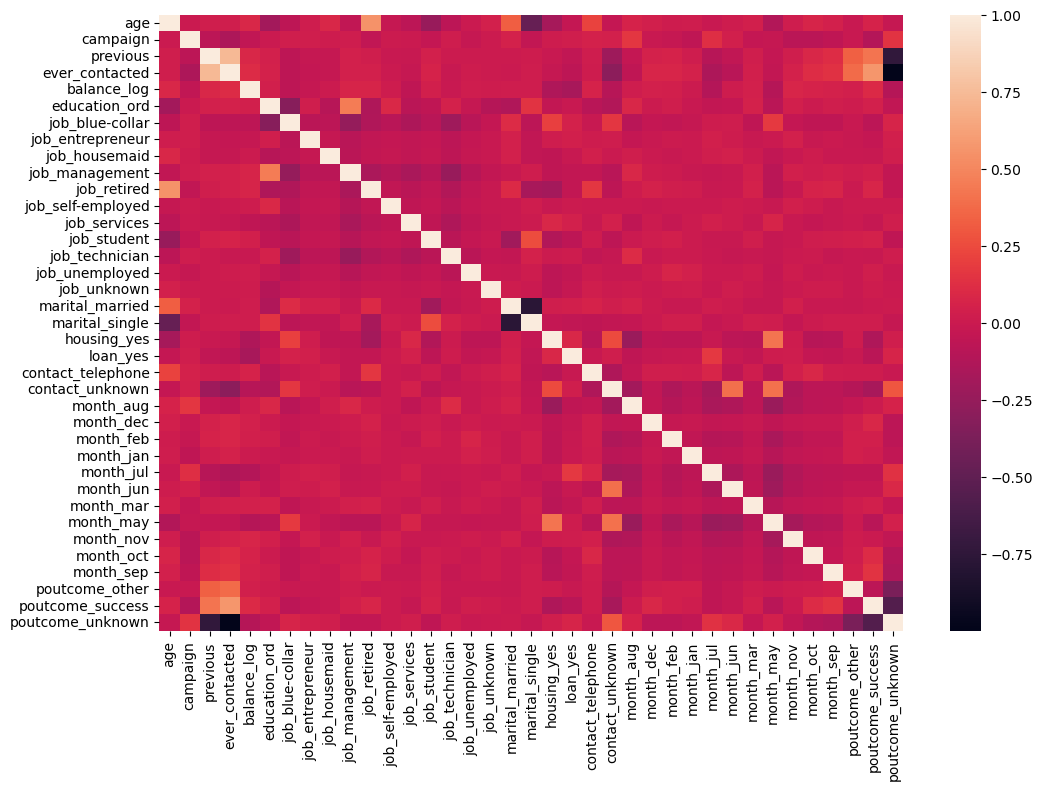

In [45]:
figure = plt.figure(figsize=(12, 8))
pd.set_option('display.max_columns', None)
sb.heatmap(df_balanced.drop(columns=["y"]).corr())
plt.show()

In [46]:
df_balanced.drop("ever_contacted", axis=1, inplace=True) # removed ever_contacted as it has high covariance with target column

In [47]:
df_balanced.drop("poutcome_unknown", axis=1, inplace=True) # removed poutcome_unknown as it has high covariance with target column

## 8). Scaling the values of data (Using Standard scaler)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['age', 'campaign', 'previous', 'balance_log']
    
df_balanced[cols_to_scale] = scaler.fit_transform(df_balanced[cols_to_scale])

In [49]:
df_balanced.head() # FINAL preprocessed balanced dataframe ready for modeling

,age,campaign,previous,y,balance_log,education_ord,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.400739,-0.704635,-0.438135,0,0.669243,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.228162,-0.704635,-0.438135,0,-0.531822,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.693149,-0.704635,-0.438135,0,-1.179609,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.479428,-0.704635,-0.438135,0,0.570059,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.693149,-0.704635,-0.438135,0,-1.293679,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 9). Saving the Final Cleaned and Preprocessed Data 

In [50]:
df_balanced.to_csv(r"C:\Github Projects\AI-MARKETING-STRATEGY_ADVISOR\data\processed\bank_modeling_ready.csv", index=False)

## 10). Splitting my 80% data to training data and 20% for Testing data

In [52]:
from sklearn.model_selection import train_test_split
X = df_balanced.drop(columns=['y'])
y = df_balanced['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 11). Training Models

Making an Helper Function to train and evaluate the prediction

In [53]:
#evaluation helping function
from sklearn.metrics import classification_report, f1_score, precision_recall_fscore_support, confusion_matrix

def train_eval(model, name=None):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=1)
    # average='binary':- Tells sklearn it’s a binary classification (two classes: yes/no, 0/1)
    # pos_label=1:- Specifies which class is considered the "positive" class for calculating precision and recall. Here, 1 means “yes” (subscribed)
    print(f"=== {name} ===")
    print(f"Precision: {p:.3f}  Recall: {r:.3f}  F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


### 1).Logistic Regression

In [54]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=-1)
train_eval(logreg, "LogisticRegression")


=== LogisticRegression ===
Precision: 0.733  Recall: 0.634  F1: 0.680
Confusion matrix:
 [[6139 1846]
 [2919 5065]]
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      7985
           1       0.73      0.63      0.68      7984

    accuracy                           0.70     15969
   macro avg       0.71      0.70      0.70     15969
weighted avg       0.71      0.70      0.70     15969



### 2). LightGBM

In [55]:
# LightGBM

import lightgbm as lgb
clf_lgb = lgb.LGBMClassifier(random_state=42)
train_eval(clf_lgb, 'LightGBM')



[LightGBM] [Info] Number of positive: 31938, number of negative: 31937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 63875, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
=== LightGBM ===
Precision: 0.801  Recall: 0.670  F1: 0.729
Confusion matrix:
 [[6655 1330]
 [2637 5347]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      7985
           1       0.80      0.67      0.73      7984

    accuracy                           0.75     15969
   macro avg       0.76      0.75      0.75     15969
weighted avg       0.76      0.75      0.75     15969



### 3). XGBoost

In [56]:
# XGBoost 

import xgboost as xgb
clf_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
train_eval(clf_xgb, 'XGBoost')


c:\Users\admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[13:32:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




=== XGBoost ===
Precision: 0.828  Recall: 0.761  F1: 0.793
Confusion matrix:
 [[6725 1260]
 [1910 6074]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      7985
           1       0.83      0.76      0.79      7984

    accuracy                           0.80     15969
   macro avg       0.80      0.80      0.80     15969
weighted avg       0.80      0.80      0.80     15969



### 4). Gaussian Naive Bayes

In [57]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
train_eval(clf_gnb, 'GaussianNB')


=== GaussianNB ===
Precision: 0.811  Recall: 0.444  F1: 0.574
Confusion matrix:
 [[7158  827]
 [4441 3543]]
              precision    recall  f1-score   support

           0       0.62      0.90      0.73      7985
           1       0.81      0.44      0.57      7984

    accuracy                           0.67     15969
   macro avg       0.71      0.67      0.65     15969
weighted avg       0.71      0.67      0.65     15969



### 5). Decision Tree

In [60]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
train_eval(dt, "DecisionTree")


=== DecisionTree ===
Precision: 0.896  Recall: 0.999  F1: 0.945
Confusion matrix:
 [[7061  924]
 [   7 7977]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      7985
           1       0.90      1.00      0.94      7984

    accuracy                           0.94     15969
   macro avg       0.95      0.94      0.94     15969
weighted avg       0.95      0.94      0.94     15969



### 6). Random Forest

In [61]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42, n_jobs=-1)
train_eval(rf, "RandomForest")


=== RandomForest ===
Precision: 0.944  Recall: 0.999  F1: 0.971
Confusion matrix:
 [[7515  470]
 [  10 7974]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      7985
           1       0.94      1.00      0.97      7984

    accuracy                           0.97     15969
   macro avg       0.97      0.97      0.97     15969
weighted avg       0.97      0.97      0.97     15969



### 7). Extra Trees

In [62]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)
train_eval(et, "ExtraTrees")


=== ExtraTrees ===
Precision: 0.953  Recall: 0.999  F1: 0.975
Confusion matrix:
 [[7594  391]
 [  10 7974]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      7985
           1       0.95      1.00      0.98      7984

    accuracy                           0.97     15969
   macro avg       0.98      0.97      0.97     15969
weighted avg       0.98      0.97      0.97     15969



### 8). Gradient Boosting

In [63]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
train_eval(gb, "GradientBoosting")


=== GradientBoosting ===
Precision: 0.764  Recall: 0.644  F1: 0.699
Confusion matrix:
 [[6398 1587]
 [2846 5138]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7985
           1       0.76      0.64      0.70      7984

    accuracy                           0.72     15969
   macro avg       0.73      0.72      0.72     15969
weighted avg       0.73      0.72      0.72     15969



### 9). HistGradientBoosting 

In [65]:
# HistGradientBoosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
train_eval(hgb, "HistGradientBoosting")


=== HistGradientBoosting ===
Precision: 0.801  Recall: 0.676  F1: 0.734
Confusion matrix:
 [[6647 1338]
 [2584 5400]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      7985
           1       0.80      0.68      0.73      7984

    accuracy                           0.75     15969
   macro avg       0.76      0.75      0.75     15969
weighted avg       0.76      0.75      0.75     15969



### 10). AdaBoost

In [66]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=300, random_state=42)
train_eval(ada, "AdaBoost")


=== AdaBoost ===
Precision: 0.731  Recall: 0.658  F1: 0.692
Confusion matrix:
 [[6051 1934]
 [2733 5251]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      7985
           1       0.73      0.66      0.69      7984

    accuracy                           0.71     15969
   macro avg       0.71      0.71      0.71     15969
weighted avg       0.71      0.71      0.71     15969



### 11). SGD Classifer

In [67]:
# SGD Classifer
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', class_weight='balanced', max_iter=2000, random_state=42)
train_eval(sgd, "SGD (Logistic)")


=== SGD (Logistic) ===
Precision: 0.662  Recall: 0.739  F1: 0.698
Confusion matrix:
 [[4964 3021]
 [2080 5904]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      7985
           1       0.66      0.74      0.70      7984

    accuracy                           0.68     15969
   macro avg       0.68      0.68      0.68     15969
weighted avg       0.68      0.68      0.68     15969



### 12). KNN

In [72]:
# K-Nearest Neighbors (benefits from scaling)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
train_eval(knn, "KNN")


=== KNN ===
Precision: 0.842  Recall: 0.991  F1: 0.911
Confusion matrix:
 [[6504 1481]
 [  68 7916]]
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      7985
           1       0.84      0.99      0.91      7984

    accuracy                           0.90     15969
   macro avg       0.92      0.90      0.90     15969
weighted avg       0.92      0.90      0.90     15969



# Conclusion :- BEST MODEL IS Random Forest or Extra Trees